Copyright (c) 2022 [Georgina Flesia](georgina.flesia@unc.edu.ar)


<center>
<img src="ods_stickers.jpg" />
    
## Introducción al Machine Learning

Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.
    

http://www.famaf.proed.unc.edu.ar/course/view.php?id=936

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn import ensemble

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from xgboost import XGBClassifier

# IntML2022 - Trabajo especial


La base de datos sobre la cual trabajaremos será la base de datos FIFA2022 que se encuentra en el archivo 'players_22.csv'.

Estas son las posiciones de los jugadores listados en el archivo Fifa22

https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset


 El objetivo del trabajo es predecir la posicion general en el campo  de juego (Defensor, Mediocampista, Atacante) a partir de sus atributos generales. Las posiciones serán categorizadas de la siguiente manera (utilizar los colores indicados cuando se refiera a cada clase):  


**Arqueros**: Naranja

- GK: Goalkeeper

**Defensores**: Amarillo

- CB: Center-back
- LCB: Left center-back
- RCB: Right center-back
- LB: Left-back (Full-back)
- RB: Right-back (Full-back)

**Mediocampista**: Verde

- CM : Centre midfield
- LDM: Left center midfield
- LAM: Left attacking midfield
- RDM: Right center midfield
- RAM: Right attacking midfield
- CDM: Centre defensive midfield
- CAM: Centre attacking midfield
- LM : Left midfield
- RM : Right midfield

**Delantero**: Azul

- ST: Striker
- CF: Center forward
- LW: Left winger
- RW: Right winger



 Este es un dataset con muchos NAN y campos vacios por lo cual hay que estudiar y corregir el dataset antes de correr los algoritmos.

### 1.) a.) Explique qué procedimiento se está realizando en las siguientes casillas.

In [2]:
data = pd.read_csv('/home/floormolina99/Aprendizaje Automatico/Trabajo final/players_22.csv')

arquero = ['GK']
defensor = ['CB', 'LCB', 'RCB', 'LB' , 'RB']
mediocampista = ['CM', 'LDM', 'LAM', 'RDM', 'CDM', 'CAM', 'LM', 'RM']
atacante = ['ST', 'CF', 'LW', 'RW']

# Lo que se realiza aca es redefinir las posiciones de los jugadores como arquero, defensor, mediocampista o atacante
data['posicion'] = ''
for i, posicion_del_jugador in enumerate(data['player_positions']):
    for posicion in arquero:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'arquero'
    for posicion in defensor:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'defensor'
    for posicion in mediocampista:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'mediocampista'
    for posicion in atacante:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'atacante'           

In [3]:
# data.isna() devuelve una matriz de booleanos en la que cada posicion indica si ese valor esta perdido o no. Hacer .sum() suma sobre los valores
# True de esa matriz y haciendo ascending=False le pedimos que nos de las columnas con mas valores perdidos
nans = data.isna().sum().sort_values(ascending=False)
print(nans[nans!=0]/data.shape[0]) #Aca nos da la proporcion de valores perdidos de cada columna 

nation_jersey_number         0.960549
nation_logo_url              0.960549
nation_position              0.960549
nation_team_id               0.960549
club_loaned_from             0.942721
player_tags                  0.925100
goalkeeping_speed            0.889183
player_traits                0.511513
dribbling                    0.110817
shooting                     0.110817
passing                      0.110817
physic                       0.110817
defending                    0.110817
pace                         0.110817
release_clause_eur           0.061126
club_joined                  0.060450
value_eur                    0.003846
club_contract_valid_until    0.003171
league_level                 0.003171
club_jersey_number           0.003171
club_position                0.003171
league_name                  0.003171
club_name                    0.003171
wage_eur                     0.003171
club_logo_url                0.003171
club_flag_url                0.003171
club_team_id

In [4]:
drop_vars = nans[list(nans/data.shape[0] > 0.5)].keys() #aca ubicamos las columnas del dataframe que tienen mas del 50% de valores perdidos
for var in drop_vars:
    print(var)
    data.drop(var,inplace=True,axis=1) #desechamos las columnas que identificamos anteriormente

nation_jersey_number
nation_logo_url
nation_position
nation_team_id
club_loaned_from
player_tags
goalkeeping_speed
player_traits


In [5]:
# Llenamos los valores perdidos que quedaron en el dataframe y para hacerlo le pedimos que utilize el promedio sobre los datos 
# que no son nulos 
data.fillna(data.mean(numeric_only=True), inplace=True)

In [6]:
# Identificamos las variables categoricas
categorical_variables = ['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_flag_url',
 'posicion']

# Para valores del archivo de datos que caen en las columnas que identificamos como categóricas, pasamos estos valores a objeto. En caso que 
# no sean categóricas, las pasamos a variables numéricas reales (float)
for val in data:
    if val in categorical_variables:
        data[val]=data[val].astype('object')
    else:
        pd.to_numeric(data[val], downcast="float")

In [7]:
# Definimos como nuestras variables X a las columnas cuyo tipo sean distintos de objetos, o sea, variables numéricas
X = data.loc[:,data.dtypes != 'object']

In [8]:
# Definimos nuestra variable objetivo como la posición del jugador en la cancha
y = data['posicion']

In [9]:
# Pedimos las columnas que quedaron como variables 
X.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'release_clause_eur', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
      

In [10]:
X.head()

overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0       93         93   78000000.0  320000.0   34        170         72   
1       92         92  119500000.0  270000.0   32        185         81   
2       91         91   45000000.0  270000.0   36        187         83   
3       91         91  129000000.0  270000.0   29        175         68   
4       91         91  125500000.0  350000.0   30        181         70   

   release_clause_eur  pace  shooting  ...  mentality_penalties  \
0         144300000.0  85.0      92.0  ...                   75   
1         197200000.0  78.0      92.0  ...                   90   
2          83300000.0  87.0      94.0  ...                   88   
3         238700000.0  91.0      83.0  ...                   93   
4         232200000.0  76.0      86.0  ...                   83   

   mentality_composure  defending_marking_awareness  \
0                   96                           20   
1                   88                           35   
2                   95                           24   
3                   93                           35   
4                   89                           68   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         35                        24                   6   
1                         42                        19                  15   
2                         32                        24                   7   
3                         32                        29                   9   
4                         65                        53                  15   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                     6                   12                        8   
2                    11                   15                       14   
3                     9                   15                       15   
4                    13                    5                       10   

   goalkeeping_reflexes  
0                     8  
1                    10  
2                    11  
3                    11  
4                    13  

[5 rows x 48 columns]

### 2. a) Realice el análisis exploratorio que crea adecuado sobre la base de datos FIFA 2022 en donde explique cada paso que realiza.

Primero vamos a ver los estadísticos para cada clase en todas las categorias 

In [11]:
data.groupby('posicion').describe()

overall                                                     \
                count       mean       std   min   25%   50%   75%   max   
posicion                                                                   
arquero        2132.0  64.419794  7.567537  47.0  59.0  64.0  69.0  91.0   
atacante       5762.0  66.387365  6.814850  47.0  62.0  66.0  71.0  93.0   
defensor       4656.0  65.652706  6.681739  47.0  62.0  66.0  70.0  89.0   
mediocampista  6689.0  65.756466  6.776466  47.0  62.0  66.0  70.0  91.0   

              potential             ... goalkeeping_positioning        \
                  count       mean  ...                     75%   max   
posicion                            ...                                 
arquero          2132.0  69.785647  ...                    69.0  92.0   
atacante         5762.0  71.600833  ...                    13.0  33.0   
defensor         4656.0  70.752363  ...                    13.0  32.0   
mediocampista    6689.0  71.270145  ...                    13.0  24.0   

              goalkeeping_reflexes                                         \
                             count       mean       std   min   25%   50%   
posicion                                                                    
arquero                     2132.0  65.924015  8.024706  45.0  60.0  66.0   
atacante                    5762.0  10.358556  3.061291   2.0   8.0  10.0   
defensor                    4656.0  10.306916  3.022096   3.0   8.0  10.0   
mediocampista               6689.0  10.324563  3.019385   2.0   8.0  10.0   

                           
                75%   max  
posicion                   
arquero        72.0  90.0  
atacante       13.0  37.0  
defensor       13.0  34.0  
mediocampista  13.0  23.0  

[4 rows x 384 columns]

Distinguimos las categorias que refieren a aspectos de un jugador en grupos: caracteristicas físicas como el peso o la altura, por otro lado las habilidades en el juego, posicionamiento en el terreno de juego, o velocidad de movimiento

In [12]:
columns1 = ['height_cm','weight_kg','age']
columns2 = ['pace', 'shooting', 'passing']
columns3 = ['power_jumping', 'power_stamina', 'power_strength']
columns4 = ['dribbling', 'defending']
columns5 = ['movement_acceleration', 'movement_sprint_speed',
       'movement_agility']

In [13]:
data.groupby(['posicion'])[columns1].describe()

height_cm                                                    \
                  count        mean       std    min    25%    50%    75%   
posicion                                                                    
arquero          2132.0  188.533771  4.742876  174.0  185.0  188.0  192.0   
atacante         5762.0  179.887365  6.486174  156.0  175.0  180.0  185.0   
defensor         4656.0  183.593643  6.157914  160.0  180.0  184.0  188.0   
mediocampista    6689.0  178.613844  6.034336  155.0  175.0  178.0  183.0   

                     weight_kg             ...                  age  \
                 max     count       mean  ...   75%    max   count   
posicion                                   ...                        
arquero        206.0    2132.0  81.697467  ...  86.0  107.0  2132.0   
atacante       203.0    5762.0  73.837730  ...  78.0  110.0  5762.0   
defensor       202.0    4656.0  76.916022  ...  81.0  100.0  4656.0   
mediocampista  203.0    6689.0  72.368964  ...  76.0   96.0  6689.0   

                                                                  
                    mean       std   min   25%   50%   75%   max  
posicion                                                          
arquero        26.198874  5.518268  16.0  22.0  25.0  30.0  43.0  
atacante       25.035404  4.620746  16.0  21.0  25.0  28.0  54.0  
defensor       25.480026  4.712170  16.0  22.0  25.0  29.0  41.0  
mediocampista  24.859620  4.559796  16.0  21.0  24.0  28.0  41.0  

[4 rows x 24 columns]

Vemos que en edad los arqueros tienen un promedio mas alto que las otras categorías, lo mismo sucede con el peso y la altura. Las demas categorias no se distinguen mucho entre si en estos aspectos, al menos preliminarmente.

In [14]:
data.groupby(['posicion'])[columns2].describe()

pace                                                 \
                count       mean           std        min        25%   
posicion                                                               
arquero        2132.0  68.213071  1.208206e-12  68.213071  68.213071   
atacante       5762.0  72.982645  9.745381e+00  28.000000  68.000000   
defensor       4656.0  63.550473  1.150925e+01  28.000000  57.000000   
mediocampista  6689.0  67.349978  9.810660e+00  28.000000  62.000000   

                                               shooting             ...  \
                     50%        75%        max    count       mean  ...   
posicion                                                            ...   
arquero        68.213071  68.213071  68.213071   2132.0  52.345297  ...   
atacante       74.000000  79.750000  97.000000   5762.0  61.426762  ...   
defensor       65.000000  72.000000  93.000000   4656.0  37.850301  ...   
mediocampista  68.000000  73.000000  96.000000   6689.0  54.611900  ...   

                                    passing                           \
                     75%        max   count       mean           std   
posicion                                                               
arquero        52.345297  52.345297  2132.0  57.312562  1.961558e-12   
atacante       68.000000  94.000000  5762.0  57.472579  9.506520e+00   
defensor       45.000000  75.000000  4656.0  50.876718  9.822367e+00   
mediocampista  62.000000  86.000000  6689.0  61.654507  8.160862e+00   

                                                                      
                     min        25%        50%        75%        max  
posicion                                                              
arquero        57.312562  57.312562  57.312562  57.312562  57.312562  
atacante       30.000000  51.000000  58.000000  64.000000  91.000000  
defensor       25.000000  44.000000  51.000000  58.000000  88.000000  
mediocampista  29.000000  56.000000  61.000000  67.000000  93.000000  

[4 rows x 24 columns]

La longitud de la zancada ('pace') no varia apreciablemente entre categorías, pero las habilidades relacionadas al pateo de la pelota y los pases son muchisimo mas bajas en arqueros, y en menor medida en defensores. Mediocampistas y atacantes tienen valores similares, siendo los atacantes los que tienen valores mas altos. 

In [15]:
data.groupby(['posicion'])[columns3].describe()

power_jumping                                                \
                      count       mean        std   min   25%   50%   75%   
posicion                                                                    
arquero              2132.0  56.648687  11.746778  22.0  50.0  58.0  65.0   
atacante             5762.0  65.376952  12.228536  29.0  58.0  66.0  73.0   
defensor             4656.0  70.518041  10.276128  29.0  65.0  71.0  77.0   
mediocampista        6689.0  62.959785  11.351484  29.0  56.0  63.0  71.0   

                    power_stamina             ...             power_strength  \
                max         count       mean  ...   75%   max          count   
posicion                                      ...                              
arquero        84.0        2132.0  29.374296  ...  35.0  45.0         2132.0   
atacante       95.0        5762.0  66.056751  ...  74.0  95.0         5762.0   
defensor       94.0        4656.0  66.817655  ...  73.0  95.0         4656.0   
mediocampista  94.0        6689.0  68.671251  ...  77.0  97.0         6689.0   

                                                                   
                    mean        std   min   25%   50%   75%   max  
posicion                                                           
arquero        59.773921  11.068683  25.0  53.0  61.0  68.0  85.0  
atacante       64.757723  12.894346  22.0  57.0  66.0  74.0  97.0  
defensor       71.672466  10.833091  24.0  65.0  73.0  80.0  96.0  
mediocampista  62.252205  12.249350  19.0  55.0  64.0  71.0  94.0  

[4 rows x 24 columns]

De nuevo, todas las habilidades relacionadas a la capacidad de saltar, la resistencia y la fuerza sob considerablemente mas bajas en arqueros, y muy similares en las otras tres posiciones, a excepcion de la fuerza que es considerablemente mas baja en mediocampistas que en los demas.

In [16]:
data.groupby(['posicion'])[columns4].describe()

dribbling                                                 \
                  count       mean           std        min        25%   
posicion                                                                 
arquero          2132.0  62.561174  2.110807e-12  62.561174  62.561174   
atacante         5762.0  66.174072  7.555229e+00  36.000000  61.000000   
defensor         4656.0  54.531143  9.873066e+00  27.000000  48.000000   
mediocampista    6689.0  65.038421  7.678275e+00  33.000000  60.000000   

                                               defending             \
                     50%        75%        max     count       mean   
posicion                                                              
arquero        62.561174  62.561174  62.561174    2132.0  51.703630   
atacante       66.000000  71.000000  95.000000    5762.0  37.861333   
defensor       55.000000  62.000000  87.000000    4656.0  64.282431   
mediocampista  65.000000  70.000000  91.000000    6689.0  54.871879   

                                                                               
                        std       min       25%       50%       75%       max  
posicion                                                                       
arquero        1.421419e-12  51.70363  51.70363  51.70363  51.70363  51.70363  
atacante       1.417181e+01  14.00000  27.00000  34.00000  46.00000  84.00000  
defensor       7.432382e+00  43.00000  59.00000  64.00000  69.00000  91.00000  
mediocampista  1.317857e+01  16.00000  47.00000  58.00000  64.00000  89.00000

Observamos que el dribbling es muy bajo en defensores y casi igual en las demas catgorías, mientras que la defensa es, como es de esperar, muy alta en defensores, mas baja en arqueros, luego mas baja en mediocampistas e inexistente para atacantes.

In [17]:
data.groupby(['posicion'])[columns5].describe()

movement_acceleration                                          \
                              count       mean        std   min   25%   50%   
posicion                                                                      
arquero                      2132.0  36.327861  11.293363  14.0  28.0  36.0   
atacante                     5762.0  72.919646  10.281102  27.0  67.0  74.0   
defensor                     4656.0  62.721220  11.998515  27.0  55.0  64.0   
mediocampista                6689.0  67.904470  10.101399  29.0  63.0  68.0   

                          movement_sprint_speed             ...              \
                75%   max                 count       mean  ...   75%   max   
posicion                                                    ...               
arquero        45.0  65.0                2132.0  36.618199  ...  45.0  65.0   
atacante       80.0  97.0                5762.0  73.023256  ...  80.0  97.0   
defensor       71.0  94.0                4656.0  64.204038  ...  72.0  94.0   
mediocampista  74.0  96.0                6689.0  66.868889  ...  73.0  96.0   

              movement_agility                                                \
                         count       mean        std   min   25%   50%   75%   
posicion                                                                       
arquero                 2132.0  38.886961  11.082637  18.0  31.0  37.0  45.0   
atacante                5762.0  70.699583  10.689792  28.0  64.0  71.0  78.0   
defensor                4656.0  58.217784  12.236895  25.0  50.0  59.0  67.0   
mediocampista           6689.0  68.820152  10.396265  29.0  62.0  69.0  76.0   

                     
                max  
posicion             
arquero        70.0  
atacante       96.0  
defensor       95.0  
mediocampista  94.0  

[4 rows x 24 columns]

Por ultimo, vemos que las habilidades relacionadas con el movimiento son bajisimas en arqueros, muy altas en atacantes y mediocampistas y ligeramente mas bajas en defensores.

Realizamos ahora un mapa de correlaciones entre todas las variables numéricas usando el comando heatmap de seaborn. 

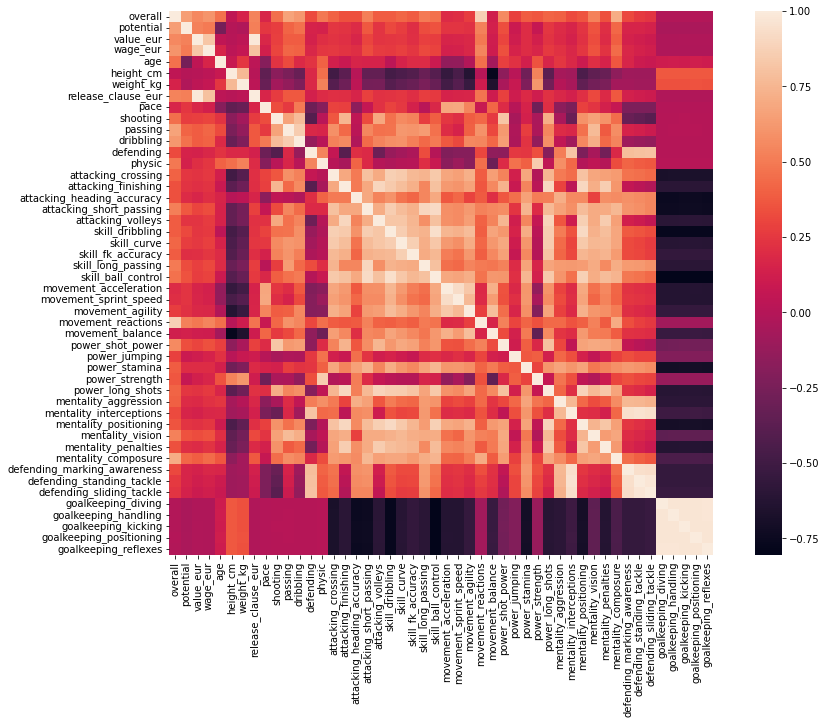

In [18]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),square=True)
plt.savefig('corr_matrix.jpg', bbox_inches = 'tight')

Observemos que las variables relacionadas a las habilidades de ataque estan fuertemente correlacionadas entre si, lo mismo ocurre para las de movimiento, poder ('power'), mentality y defensa. Observemos tambien que si bien la habilidades de 'goalkeeping' estan fuertemente correlacionadas entre si, se correlacionan negativamente con todas las demas variables o no se correlacionan, a diferencia de las demas que muestran algun grado de correlación entre todas. 

Ahora realizaremos graficos de distribucion y correlacion entre las variables, agrupadas por tipos de habilidades. 

<Figure size 720x720 with 0 Axes>

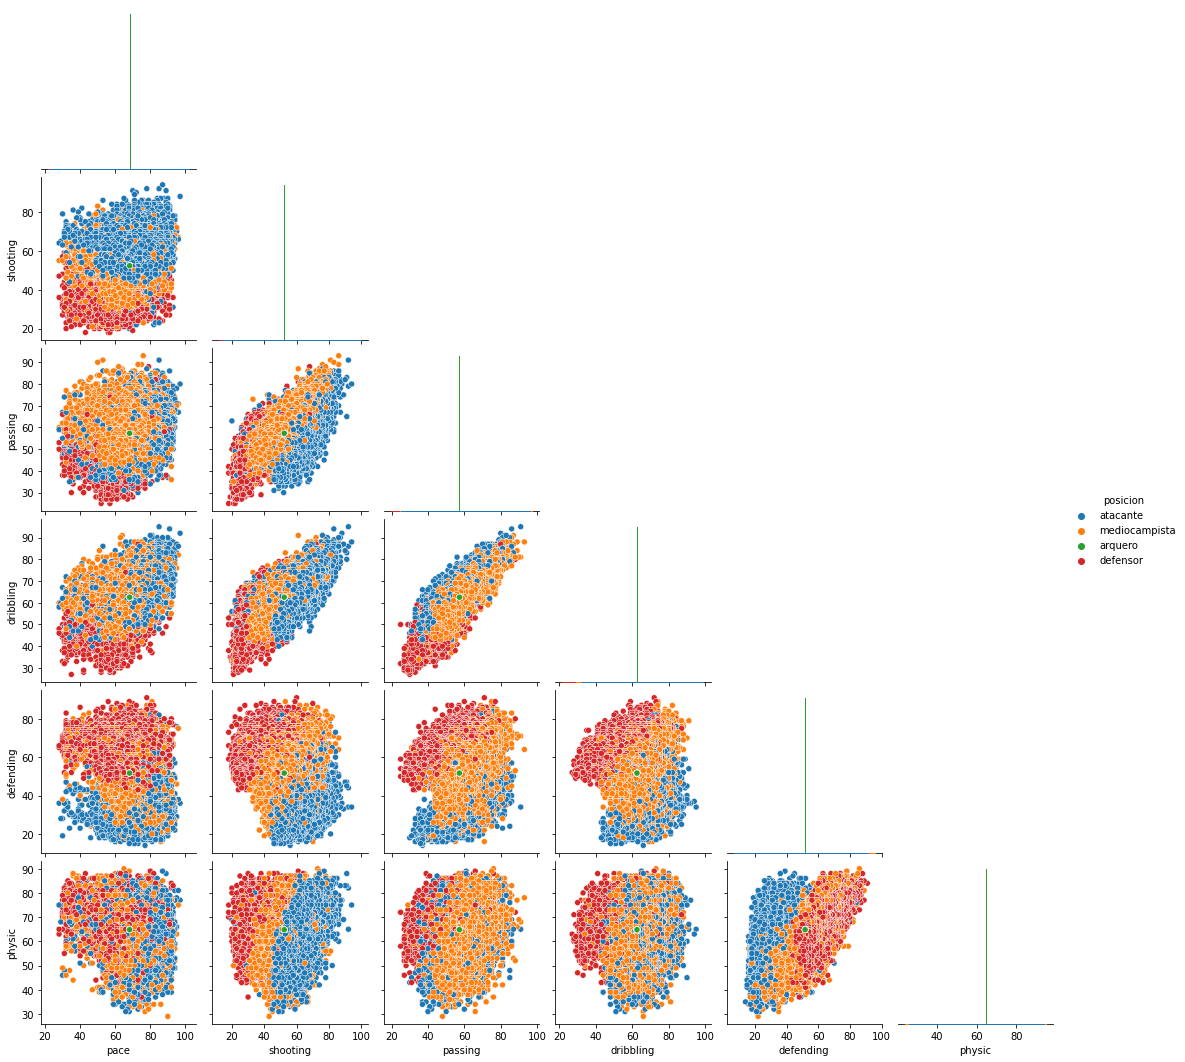

In [19]:
dat = X.join(y)

col = ['pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic']
dat = X[col]
dat = dat.join(y)
fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)
plt.savefig('pairplot_1.jpg', bbox_inches = 'tight')

Vemos que passing, dribbling y shooting tienen una correlacion de tipo aproximadamente lineal entre si, sin tener las otras variables algun tipo de correlación apreciable. Es notorio tambien que los arqueros toman todos un unico valor en estas variables. Por ultimo, notemos que al menos en estas variables, las tres categorias restantes se distinguen apreciablemente entre ellas, a excepcion de 'pace'. 

<Figure size 720x720 with 0 Axes>

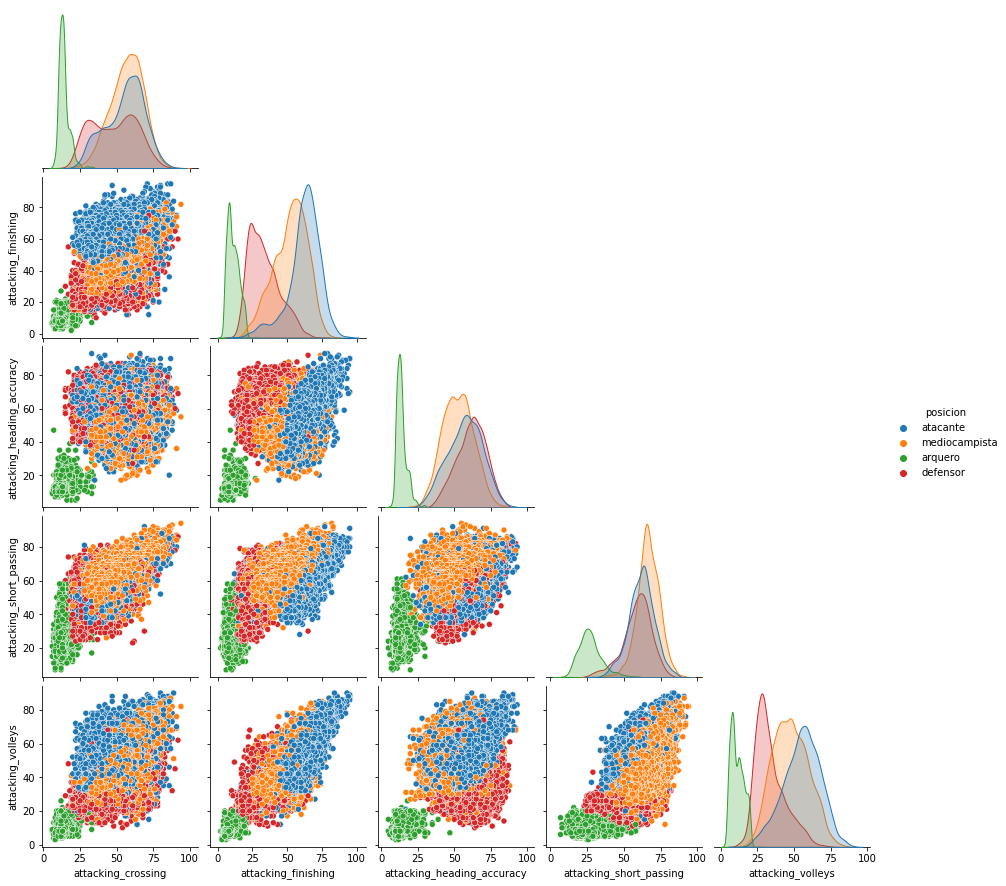

In [20]:
col = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys']
dat = X[col]
dat = dat.join(y)
fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)
plt.savefig('pairplot_2.jpg', bbox_inches = 'tight')

Vemos que en todas las variables relacionadas a las capacidades de ataque los arqueros tienen distribuciones muy centradas y alejadas de las demas categorias, presentando valores bajos en todas estas. Los defensores se distinguen tambien bastante de atacantes y mediocampistas, que presentas distribuciones muy similares en estas variables. En attacking_crossing los defensores tienen una distribucion bimodal, estando uno de los picos de esta distribucion muy cercano a los de atacantes y mediocampistas.

<Figure size 720x720 with 0 Axes>

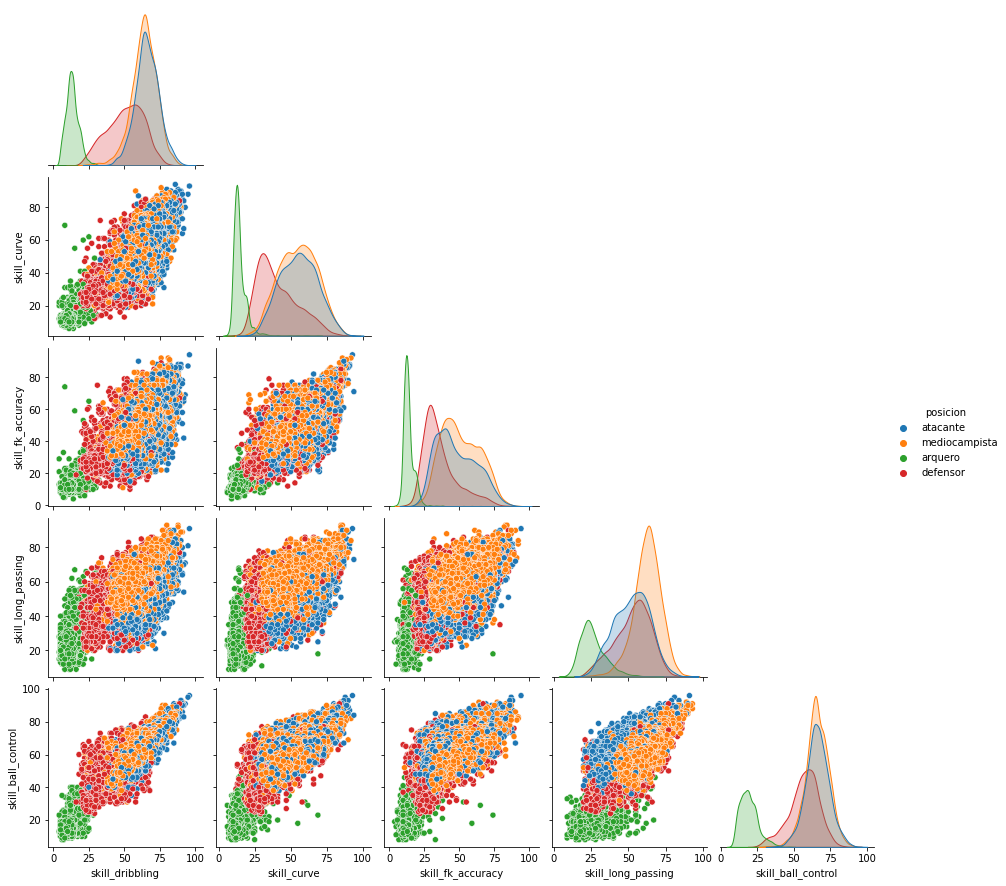

In [21]:
col = ['skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control']
dat = X[col]
dat = dat.join(y)
fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)
plt.savefig('pairplot_3.jpg', bbox_inches = 'tight')

Se observa un fenomeno similar al de los gráficos anteriores, habiendo correlaciones aproximadamente lineales entre varias de ellas. Las distribuciones para atacantes y mediocampistas son muy similares en todas estas variables, a excepcion de skill_long_passing que es muy elevada y centrada en mediocampistas y presenta distribuciones casi iguales para atacantes y defensores (lo cual tiene sentido si pensamos que un mediocampista debe hacer buenos pases largos para todo el campo de juego, siendo esta habilidad no tan necesaria para atacantes o defensores). 

<Figure size 720x720 with 0 Axes>

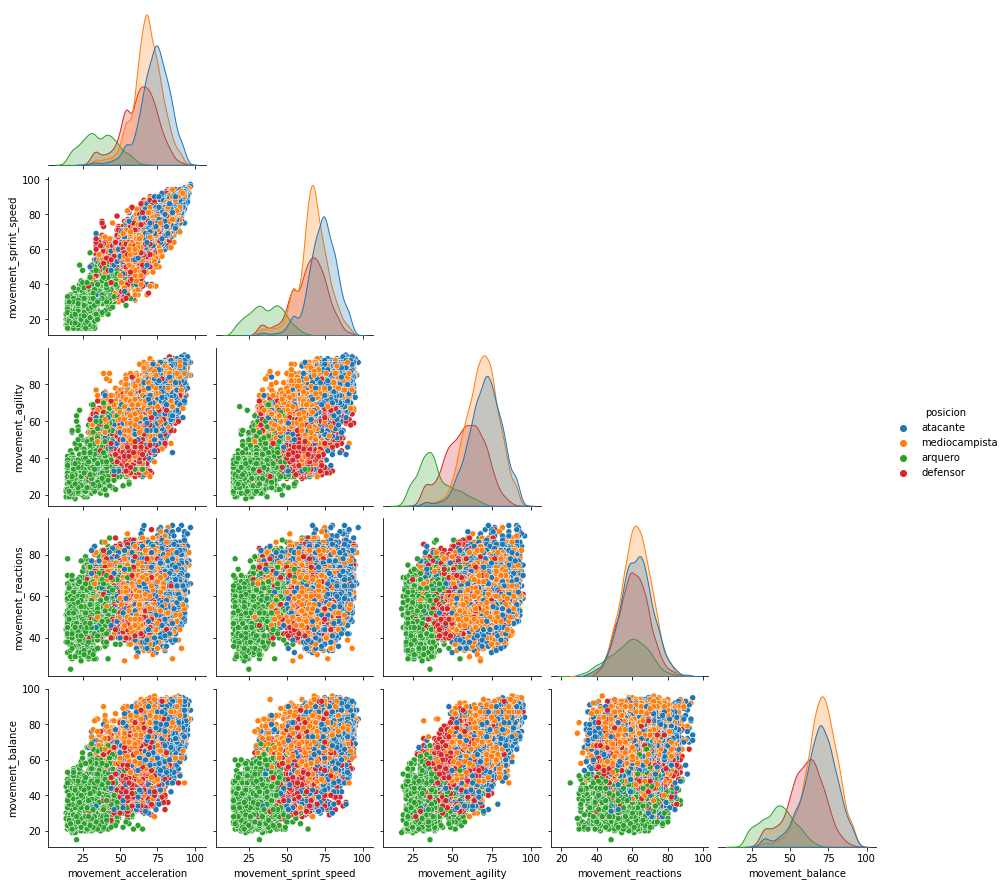

In [22]:
col = ['movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance']
dat = X[col]
dat = dat.join(y)
fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)
plt.savefig('pairplot_4.jpg', bbox_inches = 'tight')

En las habilidades relacionadas al movimiento, vemos que atacantes y mediocampistas presentan distribuciones casi identicas, a excepcion de la aceleracion y velocidad de pique que son apenas mas elevadas para atacantes. Los defensores tienen distribuciones con mas varianza que los demas, pero con medias similares. Los arqueros, como antes, se diferencian bastante de los demas, teniendo valores mucho menores. 

<Figure size 720x720 with 0 Axes>

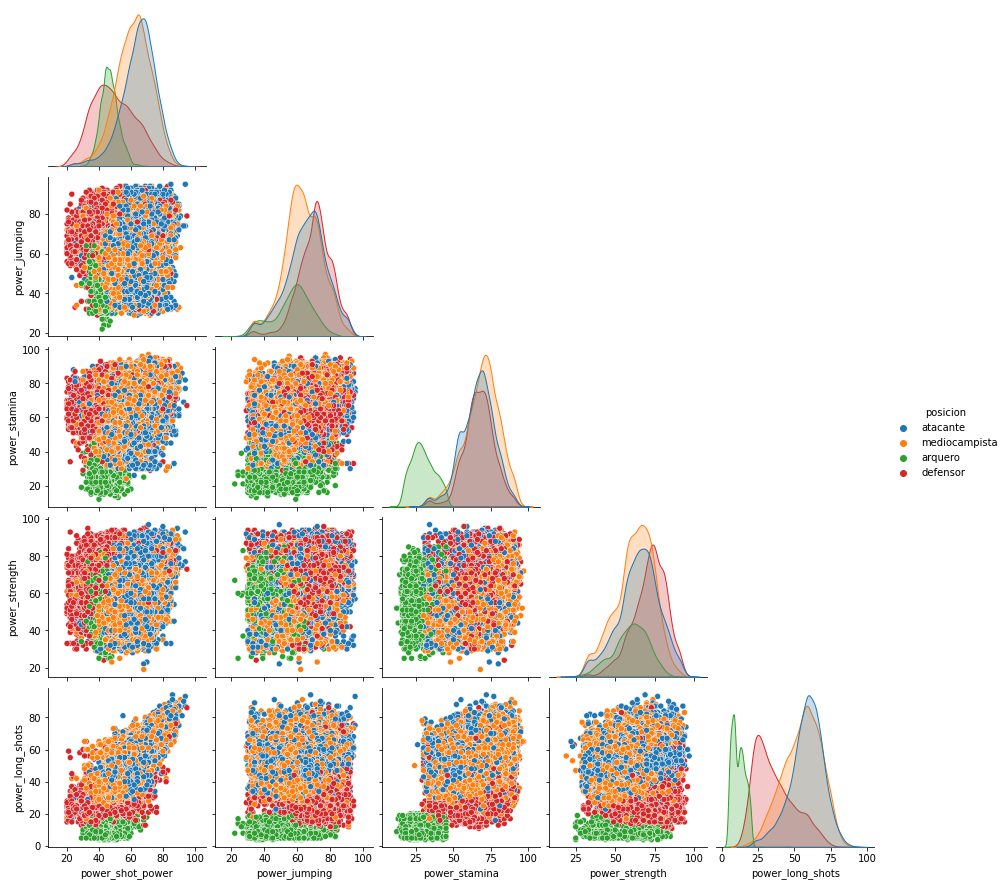

In [23]:
col = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots']
dat = X[col]
dat = dat.join(y)
fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)
plt.savefig('pairplot_5.jpg', bbox_inches = 'tight')

La habilidades relacionadas a la energia de los jugadores son practicamente indistinguibles entre mediocampistas y atacantes, y tambien en defensores y aruqeros en las variables power_strength y power_jumping, en cuanto a power_shot_power arqueros y defensores tienen distribuciones con medias similares. 

<Figure size 720x720 with 0 Axes>

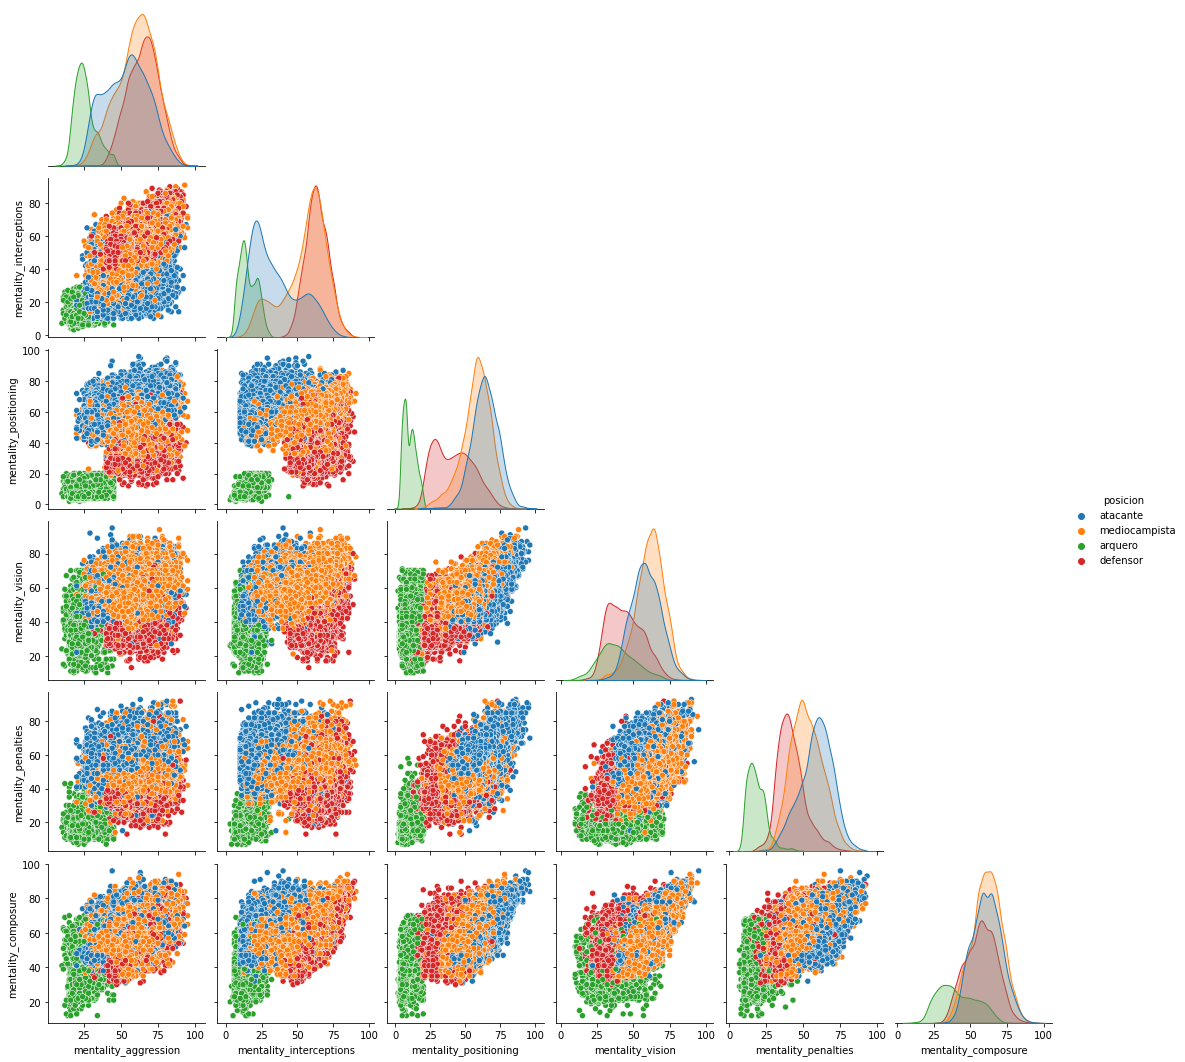

In [24]:
col = ['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure']
dat = X[col]
dat = dat.join(y)
fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)
plt.savefig('pairplot_6.jpg', bbox_inches = 'tight')

Se observan en todas estas variables fenomenos similares a los anteriores: para arqueros las distribuciones son marcadamente diferentes a los demas, en defensores se observan o bien distribuciones bimodales con medias cercanas a las de atacantes y mediocampistas y a las de aruqeros, o bien distribuciones que se encuentran entre las de mediocampistas y atacantes.  

<Figure size 720x720 with 0 Axes>

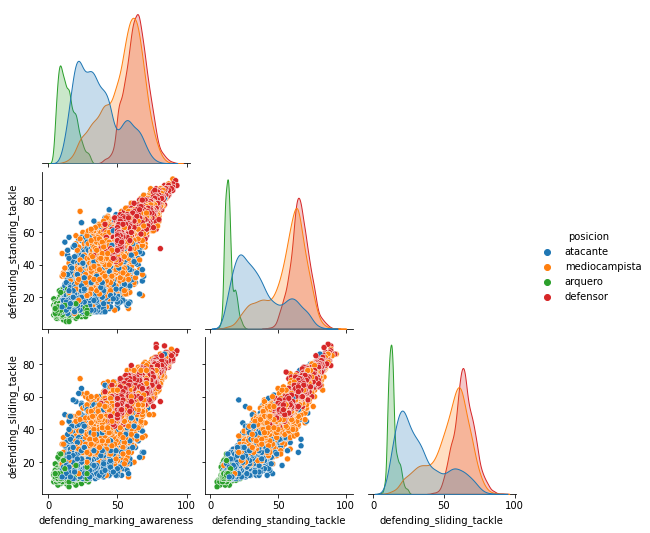

In [25]:
col = ['defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']
dat = X[col]
dat = dat.join(y)
fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)
plt.savefig('pairplot_7.jpg', bbox_inches = 'tight')

En las habilidades de defensa, se observa que defensores y mediocampistas tienen distribuciones con medias similares, pero con mayor varianza en mediocampistas. Los atacantes tienen distribuciones bimodales, con una de las medias similar a las de defensores y mediocampistas y la otra mas cercana a la de arqueros. Los arqueros tienen habilidades muy bajas en defensa y sin una varianza apreciable. 

<Figure size 720x720 with 0 Axes>

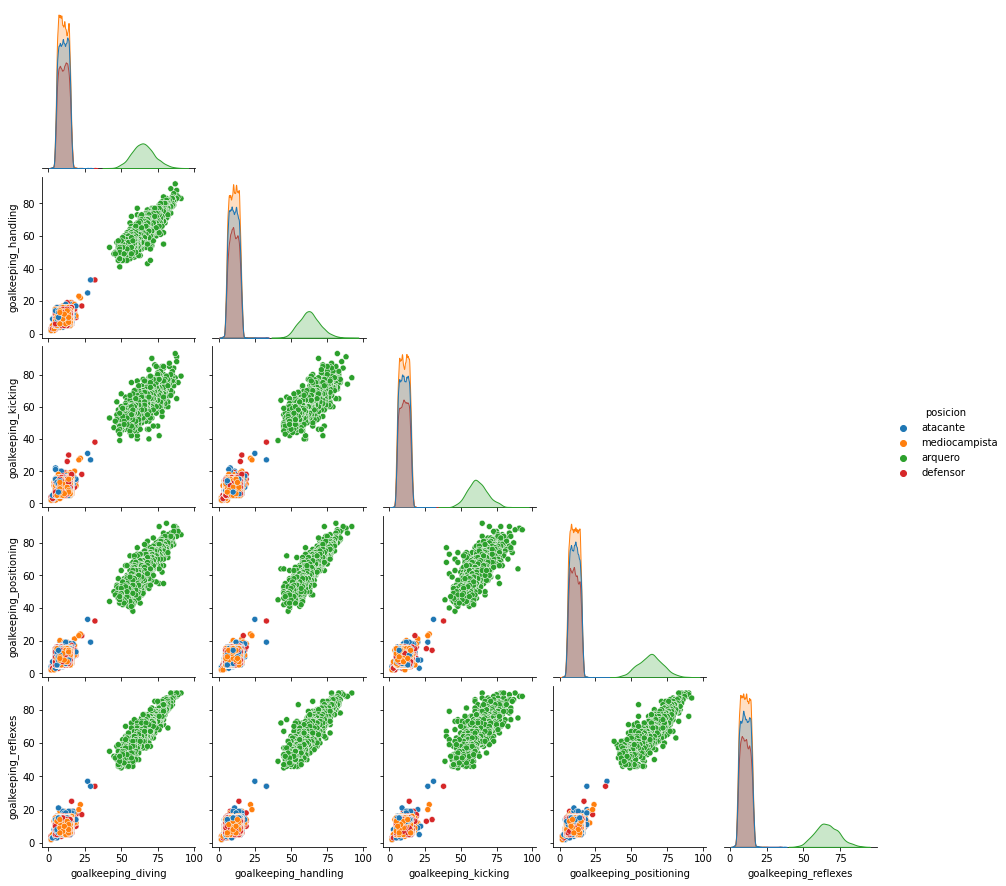

In [26]:
col = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
dat = X[col]
dat = dat.join(y)
fig = plt.figure(figsize=(10,10))
sns.pairplot(dat, hue='posicion', corner=True)
plt.savefig('pairplot_8.jpg', bbox_inches = 'tight')

En todas las habilidades relacionadas a goalkeeping, los arqueros presentan valores altos y con una varianza apreciable, mientras que estas habilidades son igualmente bajas para todas las demas categorias. 

### 2.b) Grafique bloxplots de las siguientes variables por clase : ['Age','Overall','Potential','Stamina','Strength']


<Figure size 1080x720 with 0 Axes>

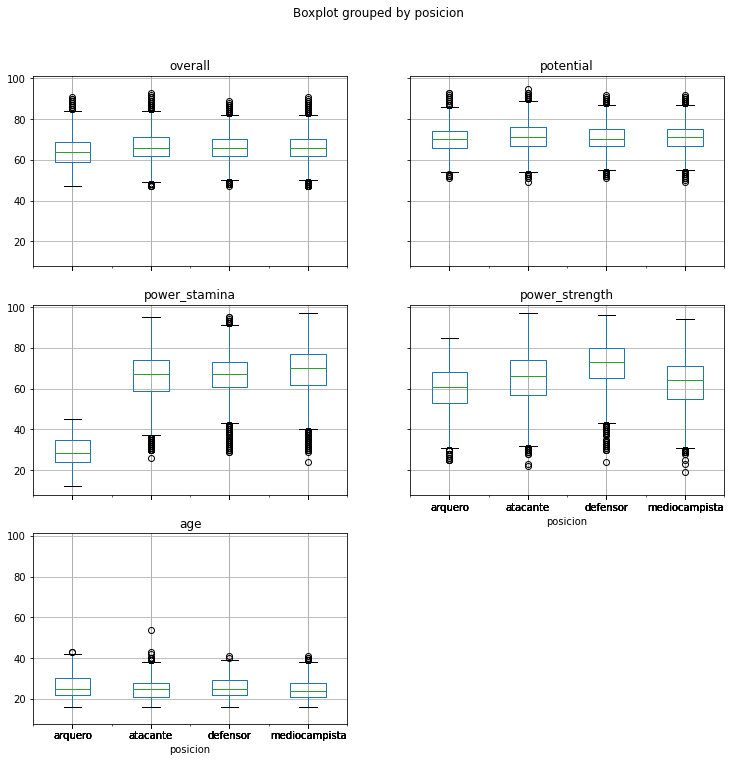

In [27]:
variables = ['overall','potential','power_stamina','power_strength','age'] #,'stamina','strength']
fig = plt.figure(figsize=(15,10))
data.boxplot(column=variables, by = 'posicion', figsize=(12,12))#, ax=None, fontsize=None, rot=0, grid=True, layout=None, return_type=None, backend=None)
plt.savefig('boxplot.jpg', bbox_inches = 'tight')

Observemos que las variables 'overall', 'potential', 'power_strength' y 'age' no podeeen distribuciones apreciablemente distintas entre todas las clases. La variable de 'power_stamina' es la unica que es muy baja en arqueros a comparacion de las demas clases, que tienen distribuciones similares. Se observan outliers significativos en los defensores y tambien en la variable 'power_stamina' para todas las clases salvo los arqueros. 

### 2.c) Plotee diagramas de torta mostrando como se distribuyen los 8  paises con mas jugadores federados dentro de las clases 


In [28]:
data['nationality_name'].value_counts().iloc[0:8]

England        1719
Germany        1214
Spain          1086
France          980
Argentina       960
Brazil          897
Japan           546
Netherlands     439
Name: nationality_name, dtype: int64

In [29]:
arqueros = data[data['posicion'] == 'arquero']
atacantes = data[data['posicion'] == 'atacante']
mediocampistas = data[data['posicion'] == 'mediocampista']
defensores = data[data['posicion'] == 'defensor']

In [30]:
arqueros['nationality_name'].value_counts().iloc[0:8].keys().tolist()

['England',
 'Germany',
 'Spain',
 'France',
 'Argentina',
 'Brazil',
 'United States',
 'Japan']

In [31]:
atacantes['nationality_name'].value_counts().iloc[0:8]

England      576
Germany      323
Argentina    322
Spain        308
Brazil       299
France       273
Japan        158
Sweden       135
Name: nationality_name, dtype: int64

In [32]:
mediocampistas['nationality_name'].value_counts().iloc[0:8]

England      522
Germany      480
Spain        418
France       357
Argentina    329
Brazil       315
Japan        208
Poland       155
Name: nationality_name, dtype: int64

In [33]:
defensores['nationality_name'].value_counts().iloc[0:8]

England         441
France          253
Germany         244
Spain           242
Brazil          213
Argentina       213
Netherlands     133
Saudi Arabia    116
Name: nationality_name, dtype: int64

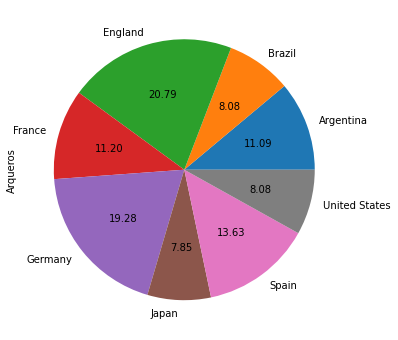

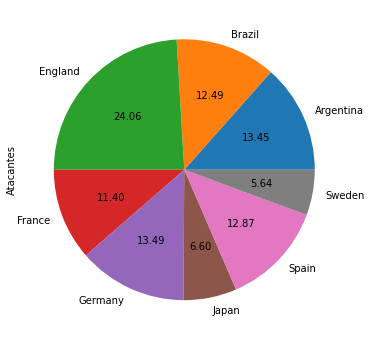

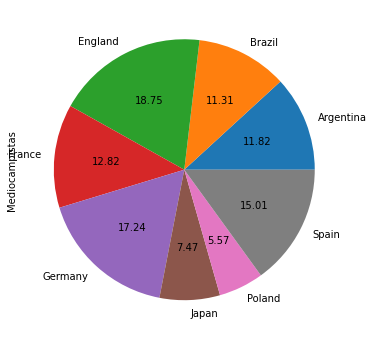

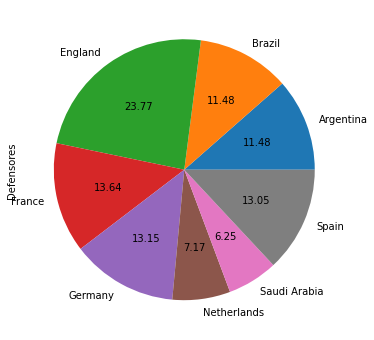

In [36]:
arqueros_eng = arqueros[arqueros['nationality_name'] == 'England']
arqueros_ger = arqueros[arqueros['nationality_name'] == 'Germany']
arqueros_spa = arqueros[arqueros['nationality_name'] == 'Spain']
arqueros_fra = arqueros[arqueros['nationality_name'] == 'France']
arqueros_arg = arqueros[arqueros['nationality_name'] == 'Argentina']
arqueros_brz = arqueros[arqueros['nationality_name'] == 'Brazil']
arqueros_usa = arqueros[arqueros['nationality_name'] == 'United States']
arqueros_jap = arqueros[arqueros['nationality_name'] == 'Japan']
paises_arq = [arqueros_eng, arqueros_ger, arqueros_spa, arqueros_fra, arqueros_arg, arqueros_brz, arqueros_usa, arqueros_jap]
arqueros_pais = pd.concat(paises_arq)
arqueros_pais.reset_index(drop=True, inplace=True)

atacantes_eng = atacantes[atacantes['nationality_name'] == 'England']
atacantes_ger = atacantes[atacantes['nationality_name'] == 'Germany']
atacantes_spa = atacantes[atacantes['nationality_name'] == 'Spain']
atacantes_fra = atacantes[atacantes['nationality_name'] == 'France']
atacantes_arg = atacantes[atacantes['nationality_name'] == 'Argentina']
atacantes_brz = atacantes[atacantes['nationality_name'] == 'Brazil']
atacantes_swe = atacantes[atacantes['nationality_name'] == 'Sweden']
atacantes_jap = atacantes[atacantes['nationality_name'] == 'Japan']
paises_atac = [atacantes_eng, atacantes_ger, atacantes_spa, atacantes_fra, atacantes_arg, atacantes_brz, atacantes_swe, atacantes_jap]
atacantes_pais = pd.concat(paises_atac)
atacantes_pais.reset_index(drop=True, inplace=True)

mediocampistas_eng = mediocampistas[mediocampistas['nationality_name'] == 'England']
mediocampistas_ger = mediocampistas[mediocampistas['nationality_name'] == 'Germany']
mediocampistas_spa = mediocampistas[mediocampistas['nationality_name'] == 'Spain']
mediocampistas_fra = mediocampistas[mediocampistas['nationality_name'] == 'France']
mediocampistas_arg = mediocampistas[mediocampistas['nationality_name'] == 'Argentina']
mediocampistas_brz = mediocampistas[mediocampistas['nationality_name'] == 'Brazil']
mediocampistas_pol = mediocampistas[mediocampistas['nationality_name'] == 'Poland']
mediocampistas_jap = mediocampistas[mediocampistas['nationality_name'] == 'Japan']
paises_med = [mediocampistas_eng, mediocampistas_ger, mediocampistas_spa, mediocampistas_fra, mediocampistas_arg, mediocampistas_brz, 
              mediocampistas_pol, mediocampistas_jap]
mediocampistas_pais = pd.concat(paises_med)
mediocampistas_pais.reset_index(drop=True, inplace=True)

defensores_eng = defensores[defensores['nationality_name'] == 'England']
defensores_ger = defensores[defensores['nationality_name'] == 'Germany']
defensores_spa = defensores[defensores['nationality_name'] == 'Spain']
defensores_fra = defensores[defensores['nationality_name'] == 'France']
defensores_arg = defensores[defensores['nationality_name'] == 'Argentina']
defensores_brz = defensores[defensores['nationality_name'] == 'Brazil']
defensores_net = defensores[defensores['nationality_name'] == 'Netherlands']
defensores_sau = defensores[defensores['nationality_name'] == 'Saudi Arabia']
paises_def = [defensores_eng, defensores_ger, defensores_spa, defensores_fra, defensores_arg, defensores_brz, defensores_net, defensores_sau]
defensores_pais = pd.concat(paises_def)
defensores_pais.reset_index(drop=True, inplace=True)
type(defensores_pais)

fig = plt.figure(figsize = (6,6))
arqueros_pais.groupby('nationality_name').size().plot(kind='pie', ylabel = 'Arqueros', autopct='%.2f')
plt.savefig('torta_arco.jpg', bbox_inches = 'tight')

fig = plt.figure(figsize = (6,6))
atacantes_pais.groupby('nationality_name').size().plot(kind='pie', ylabel = 'Atacantes',autopct='%.2f')
plt.savefig('torta_ataque.jpg', bbox_inches = 'tight')

fig = plt.figure(figsize = (6,6))
mediocampistas_pais.groupby('nationality_name').size().plot(kind='pie', ylabel = 'Mediocampistas',autopct='%.2f')
plt.savefig('torta_mediocampo.jpg', bbox_inches = 'tight')

fig = plt.figure(figsize = (6,6))
defensores_pais.groupby('nationality_name').size().plot(kind='pie', ylabel = 'Defensores',autopct='%.2f')
plt.savefig('torta_defensa.jpg', bbox_inches = 'tight')

### 3)  Observando que los arqueros son bien distintos a las restantes posiciones, los descartaremos del conjunto de datos (también descartar las variables que son exclusivas de arqueros, es decir que tienen 'goalkeeping' en el nombre). Quedarse sólo con defensores, mediocampistas y atacantes. Se desea elegir el mejor método (entre los que se presentan a continuación) que clasifique a los jugadores en las 3 clases mencionadas. 


Puede ayudarse con el siguiente material si lo desea.

https://www.youtube.com/watch?v=XXFLFWHP9Nc

https://www.youtube.com/watch?v=nuIqwnsrnH0

https://github.com/rasbt/stat451-machine-learning-fs20/tree/master/L11/code



    ###Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    ###GLM
    linear_model.LogisticRegressionCV(),
    linear_model.SGDClassifier(),
    
    ###Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    ###SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    ###Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ###Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    ###xgboost: 
    XGBClassifier()    
    
  
    
Observe que los clasificadores estan descritos con sus parámetros default. Decida que parámetros va a usar para cada método, no tiene que elegirlos a todos, pero justifique su eleccion. Si el dataset resulta muy pesado puede utilizar diversas estrategias, como reducir el conjunto de datos a los mejores 3000 jugadores, o proyectar en las primeras componentes principales. Son estrategias muy diferentes. 




In [37]:
goalkeeping = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
for var in goalkeeping:
    print(var)
    data.drop(var,inplace=True,axis=1)
data.drop(data[(data['posicion'] == 'arquero')].index, inplace=True)

goalkeeping_diving
goalkeeping_handling
goalkeeping_kicking
goalkeeping_positioning
goalkeeping_reflexes


In [38]:
X = data.loc[:,data.dtypes != 'object']
y = data['posicion']
data.shape

(17107, 98)

### 3. a) Sin hacer validación cruzada (utilizando los valores de default más algunos parámetros elegidos por ustedes que crean adecuados en cada método) y separando el conjunto de datos en 0.8 de entrenamiento y 0.2 de prueba, determine el mejor modelo para la tarea de clasificación de los jugadores en su posición. Arme una tabla comparativa con los las exactitudes (accuracies) obtenidas para identificar el mejor modelo. 

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,Y_train)
X_test = scaler.fit_transform(X_test,Y_test)

In [39]:
clfs = [ensemble.AdaBoostClassifier(), ensemble.BaggingClassifier(bootstrap_features=True), ensemble.ExtraTreesClassifier(criterion='entropy'),
        ensemble.GradientBoostingClassifier(), ensemble.RandomForestClassifier(), 
        linear_model.LogisticRegressionCV(solver='sag',max_iter=3000), linear_model.SGDClassifier(), KNeighborsClassifier(n_neighbors=10), 
        SVC(probability=True), NuSVC(probability=True), LinearSVC(max_iter=50000), DecisionTreeClassifier(criterion='entropy'), 
        ExtraTreeClassifier(), LinearDiscriminantAnalysis(solver='eigen'), QuadraticDiscriminantAnalysis(), XGBClassifier()]

scores = [None]*16
times = [None]*16
for clf in clfs:
    start_time = time.time()
    clf_fit = clf.fit(X_train,Y_train)
    score = clf_fit.score(X_test,Y_test)
    scores[clfs.index(clf)] = score
    times[clfs.index(clf)] = time.time() - start_time
    print("--- %s seconds ---" % (time.time() - start_time))
    print('La accuracy de', clf, 'es', score)

--- 2.2181107997894287 seconds ---
La accuracy de AdaBoostClassifier() es 0.700759789596727
--- 2.0983288288116455 seconds ---
La accuracy de BaggingClassifier(bootstrap_features=True) es 0.7869666861484512
--- 1.920985221862793 seconds ---
La accuracy de ExtraTreesClassifier(criterion='entropy') es 0.7904734073641145
--- 19.672373056411743 seconds ---
La accuracy de GradientBoostingClassifier() es 0.7957334891876096
--- 3.4992005825042725 seconds ---
La accuracy de RandomForestClassifier() es 0.8001168907071888
--- 171.47824788093567 seconds ---
La accuracy de LogisticRegressionCV(max_iter=3000, solver='sag') es 0.7983635300993571
--- 0.6159031391143799 seconds ---
La accuracy de SGDClassifier() es 0.7878433664523671
--- 1.9084839820861816 seconds ---
La accuracy de KNeighborsClassifier(n_neighbors=10) es 0.7796610169491526
--- 51.112330198287964 seconds ---
La accuracy de SVC(probability=True) es 0.8085914669783753
--- 111.0394377708435 seconds ---
La accuracy de NuSVC(probability=Tr

In [40]:
clf_labels = ['AdaBoost', 'Bagging Classifier', 'Extra Trees Classifier',
        'Gradient Boosting', 'Random Forest', 
        'Logistic Regression CV', 'SGD', 'K-Neighbors', 
        'SVC', 'NuSVC', 'Linear SVC', 'Decision Tree Classifier', 
        'Extra Tree Classifier', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'XGB']
columns = ['Accuracy', 'Time [s]']
scores = np.array(scores)
times = np.array(times)
acc = pd.DataFrame(data = np.array([scores,times]).T,
                  index = clf_labels, 
                  columns = columns)
acc.sort_values(by='Accuracy', ascending=False)

Accuracy    Time [s]
SVC                              0.808591   51.112328
XGB                              0.802747    4.429037
Random Forest                    0.800117    3.499199
Logistic Regression CV           0.798364  171.478245
Linear SVC                       0.798071  162.897435
Gradient Boosting                0.795733   19.672372
Linear Discriminant Analysis     0.791058    0.267970
Extra Trees Classifier           0.790473    1.920984
SGD                              0.787843    0.615901
Bagging Classifier               0.786967    2.098328
Quadratic Discriminant Analysis  0.786967    0.270047
K-Neighbors                      0.779661    1.908481
NuSVC                            0.777908  111.039436
Decision Tree Classifier         0.711572    0.401830
AdaBoost                         0.700760    2.218109
Extra Tree Classifier            0.665400    0.040329

Vemos que el clasificador con mayor accuracy es SVC, aunque el tiempo de computo que toma es mas de diez veces mayor que el segundo mejor, que es XGB, que posee una accuracy ligeramente menor. Elegimos entonces como mejor clasificador a XGB. 

### 3. b) Optimice los hiperparámetros del mejor modelo elegido utilizando validación cruzada k-fold con k=10. 

In [46]:
import warnings
warnings.filterwarnings("ignore")

estimator = XGBClassifier(eval_metric='mlogloss')
n_estimators = [50, 150, 200, 250, 300]
max_depth = [1,3,5,7,9]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2]
#eval_metric = 
#min_child_weight = range(1,6,2) 
#reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
grid_search = HalvingGridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', 
                                 n_jobs=None, cv=inner_cv, verbose=4, refit=True)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
#scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
#for i, value in enumerate(max_depth):
#    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
#plt.legend()
#plt.xlabel('n_estimators')
#plt.ylabel('Log Loss')
#pyplot.savefig('n_estimators_vs_max_depth.png'))

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 211
max_resources_: 17107
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 125
n_resources: 211
Fitting 10 folds for each of 125 candidates, totalling 1250 fits
[CV 1/10] END learning_rate=0.0001, max_depth=1, n_estimators=50;, score=(train=0.757, test=0.714) total time=   0.2s
[CV 2/10] END learning_rate=0.0001, max_depth=1, n_estimators=50;, score=(train=0.741, test=0.714) total time=   0.1s
[CV 3/10] END learning_rate=0.0001, max_depth=1, n_estimators=50;, score=(train=0.810, test=0.524) total time=   0.0s
[CV 4/10] END learning_rate=0.0001, max_depth=1, n_estimators=50;, score=(train=0.725, test=0.286) total time=   0.1s
[CV 5/10] END learning_rate=0.0001, max_depth=1, n_estimators=50;, score=(train=0.757, test=0.714) total time=   0.0s
[CV 6/10] END learning_rate=0.0001, max_depth=1, n_estimators=50;, score=(train=0.741, test=0.524) total time=   0.0s
[CV 7/10] END learning_ra

In [50]:
results = grid_result.cv_results_
dfa = pd.DataFrame(results)
dfa.sort_values('rank_test_score')[:6]
grid_result.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 250}

### 3. c) Entrene el modelo optimizado en el dataset elegido y saque conclusión acerca de la exactitud que obtuvo en la optimizacion interna de parametros. 

Probamos reduciendo el conjunto de datos a los primeros 5000 mejores jugadores, este índice esta dado por la variable 'overall'. 

In [42]:
data.sort_values('overall',ascending=False)
data.iloc[5000,5]

69

In [43]:
data_filtered = data.drop(data[(data['overall'] < 69)].index)

In [44]:
X_filt = data_filtered.loc[:,data_filtered.dtypes != 'object']
y_filt = data_filtered['posicion']
data_filtered.shape

(5794, 98)

In [45]:
X_train_filt, X_test_filt, Y_train_filt, Y_test_filt = train_test_split(X_filt, y_filt, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_filt = scaler.fit_transform(X_train_filt,Y_train_filt)
X_test_filt = scaler.fit_transform(X_test_filt,Y_test_filt)

In [46]:
clf = XGBClassifier(n_estimators = 250, max_depth = 7, learning_rate = 0.2, eval_metric='mlogloss')
clf_fit = clf.fit(X_train_filt,Y_train_filt)
score = clf_fit.score(X_test_filt,Y_test_filt)
print('La accuracy conseguida con el modelo optimizado es', score)

La accuracy conseguida con el modelo optimizado es 0.7782571182053495


Al parecer, la accuracy conseguida con el modelo optimizado es incluso mas baja que la conseguida con los parametros de default para este conjunto de datos. Vamos a entrenar entonces el modelo optimizado sobre toda la base de datos.

In [47]:
clf_fit = clf.fit(X_train,Y_train)
score = clf_fit.score(X_test,Y_test)
print('La accuracy conseguida con el modelo optimizado es', score)

La accuracy conseguida con el modelo optimizado es 0.8065458796025716


No observamos una mejora sensible en el desempeño del modelo optimizado sobre la base de datos. A pesar de que el metodo HalvingGridSearchCV si bien no efectúa una busqueda exhaustiva sobre todas las combinaciones de hiperparametros como si lo hace GridSearchCV, la efectividad conseguida por este no es apreciablemente menor a la conseguida por GridSearchCV y logra hacerlo en un tiempo de computo muchisimo menor, lo que tambien permite que podamos explorar sobre mas opciones de variacion de hiperparámetros sin tener que exceder demasiado el tiempo de computo (cabe destacar que GridSearchCV aumenta su tiempo de computo exponencialmente a medida que aumenta la cantidad de hiperparámetros). No podemos, por lo tanto, decir que el poco aumento en accuracy se deba a la eleccion del metodo de seleccion del mejor modelo. Dado que se ha variado una cantidad importante de hiperparametros (125 modelos en total que, considerando el k-fold utilizado, ascendian a 1250 modelos entrenados en total) no podemos, al menos preliminarmente, atribuir este resultado a un error en la programación o en la elección de modelo, ya que fue el que mejor se desempeñó con parametros default considerando los tiempos de computo.

### 3. d) Obtenga la matriz de confusion para el modelo óptimo entrenado en c)  y la curva ROC.

In [48]:
classes = clf_fit.classes_
classes

array(['atacante', 'defensor', 'mediocampista'], dtype=object)

Text(83.40000000000006, 0.5, 'predicted label')

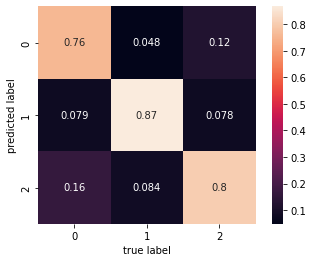

In [49]:
Y_pred = clf_fit.predict(X_test)
Y_labels = ['defensor', 'mediocampista', 'atacante']

mat = confusion_matrix(Y_test, Y_pred, normalize='true')

#cmap=plt.cm.Reds
#cmap=plt.cm.Blues
sns.heatmap(mat.T, square=True, annot=True, cbar=True)
            #xticklabels=Y_labels, yticklabels=Y_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

Volvemos a graficar pero con las etiquetas apropiadas. 

In [50]:
Y_pred

array(['atacante', 'mediocampista', 'mediocampista', ..., 'atacante',
       'atacante', 'defensor'], dtype=object)

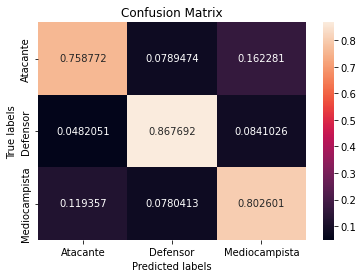

In [52]:
ax= plt.subplot()
sns.heatmap(mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Atacante', 'Defensor', 'Mediocampista']); ax.yaxis.set_ticklabels(['Atacante', 'Defensor', 'Mediocampista']);
plt.savefig('conf_matrix.jpg', bbox_inches = 'tight')

Vemos que la clasificacion de defensores fue la que mejor funcionó en el modelo, lo cual era esperable si recordamos los resultados que obtuvimos en el analisis exploratorio, en el que se observa que los defensores poseían distribuciones marcadamente diferentes a las de mediocampistas y atacantes en la mayoria de las variables numéricas. Ademas fueron muy pocos (menores al 0.01%) los casos de defensores que fueron incorrectamente clasificados, ya sean falsos positivos o falsos negativos. Observamos ademas que la clasificacion de atacantes y mediocampistas se desempeño peor que la de defensores. Vemos un porcentaje importante (16%) de atacantes que fueron clasificados erroneamente como mediocampistas y a su vez un porcentaje importante, aunque menor (12%), de mediocampistas incorrectamente clasificados como atacantes. Fueron más los atacantes clasificados erroneamente que los mediocampistas clasificados erroneamente. Esto se debe tambien a lo que se observo en el analisis exploratorio, en el que era notorio que las categorías de mediocampistas y atacantes poseian distribuciones muy similares y en varios casos indistinguibles en muchas de las variables. 

Ploteamos ahora las curvas ROC para cada clase. 

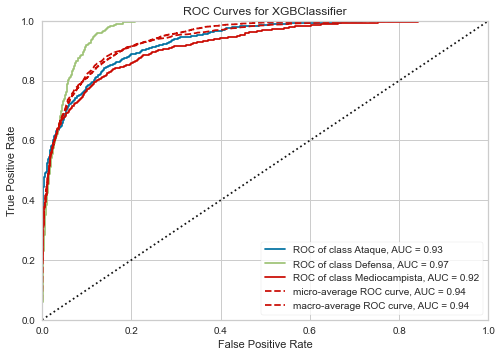

In [58]:
from yellowbrick.classifier import ROCAUC

classes=['Ataque','Defensa','Mediocampista']

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf_fit, classes=classes)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

Vemos que las curvas ROC expresan lo mismo que vimos en las matrices de confusion. El desempeño de ROC en defensores es muy alto, siendo el area AUC igual a 0.97, lo cual es un indice muy elevado. Para mediocampistas y atacantes, el desempeño AUC fue muy similar, siendo apenas 0.01 puntos menor para mediocampistas. 

### 3 e) Grafique los datos de prueba sobre las dos primeras componentes principales. Realice dos gráficos, uno coloreando los puntos según la etiqueta real y otro según la clasificacion obtenida por el modelo optimizado en c). Comente acerca de lo observado.

Primero vamos a plotear las componentes principales en orden de importancia, de acuerdo a las que acumulen mas varianza en los datos de test.

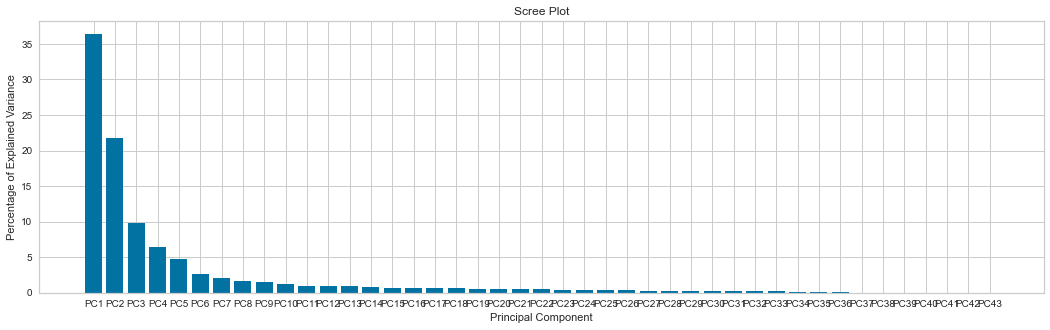

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(X_test)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
fig = plt.figure(figsize=(18,5))    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('pca.jpg', bbox_inches = 'tight')
plt.show()

Observamos que PC1 y PC2 contabilizan aproximadamente el 55% de la varianza. 

Ahora proyectamos los datos de test sobre las primeras dos componentes de PCA, coloreando los puntos segun la etiqueta real. 

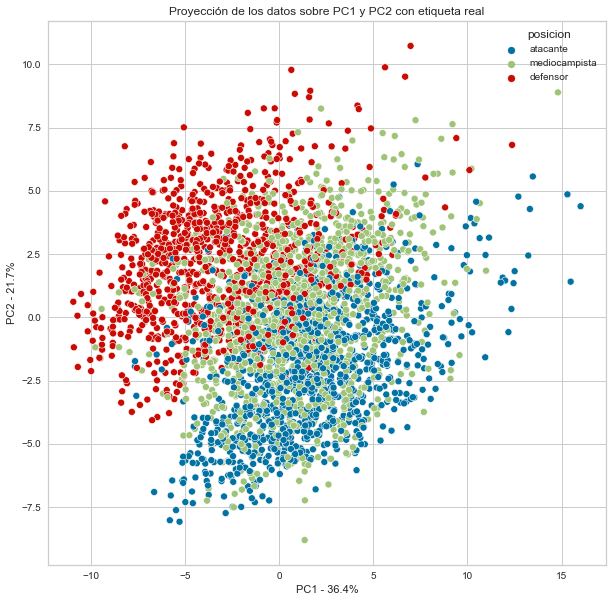

In [66]:
#type(Y_test)
#Y_test.to_numpy()
Y_test_df = pd.DataFrame(Y_test.to_numpy(), columns = ['posicion'])
Y_test_df

pca_df = pd.DataFrame(pca_data, index=range(3422), columns=labels)
pca_df_targets_real = pca_df.join(Y_test_df)

fig = plt.figure(figsize=(10,10))  
colors = {'0':'blue', '1':'orange'}
sns.scatterplot(x='PC1', y='PC2', data=pca_df_targets_real, hue='posicion')
plt.title('Proyección de los datos sobre PC1 y PC2 con etiqueta real')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.savefig('pca_real.jpg', bbox_inches = 'tight') 
plt.show()

In [67]:
Y_pred = clf_fit.predict(X_test)

In [68]:
Y_pred_df = pd.DataFrame(Y_pred, columns = ['posicion'])

In [69]:
pca_df_targets_pred = pca_df.join(Y_pred_df)
pca_df_targets_pred.dropna(axis=0, inplace=True)
pca_df_targets_pred

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      2.177351 -1.710221  4.260771  0.242727 -0.903515  1.428004 -1.462543   
1     -0.356599  2.914627 -0.293414 -1.575681  0.403706 -1.042427  0.349020   
2      0.851378  1.860703  1.920674 -5.660856  2.162897  1.128285  0.805034   
3      2.427517  3.483625 -1.054657  0.763953 -0.025501 -1.141709 -0.590359   
4     -0.138399  7.698420  0.333803  4.328474  2.929282 -0.708196  0.248940   
...         ...       ...       ...       ...       ...       ...       ...   
3417  -0.121900 -3.781413  3.576868  2.392352  0.486275 -1.073184 -1.890456   
3418   5.536495 -1.098636  0.665182  3.972609 -2.846255  0.977072 -1.885532   
3419  12.370100  6.811849 -2.791417  8.213872  7.354832  3.825184  4.285857   
3420   2.866044 -1.616035  3.231226 -1.718040 -0.426150  0.857027  0.246118   
3421   1.095811  3.345047 -1.827371  0.453430 -1.089117  0.202416 -0.959010   

           PC8       PC9      PC10  ...      PC35      PC36      PC37  \
0    -0.388358 -1.067391  0.559961  ...  0.093076 -0.079642 -0.168880   
1    -1.574546  0.381413 -0.720163  ...  0.160537  0.072176  0.037805   
2    -0.357060 -0.700813  0.136891  ...  0.044386 -0.045641  0.009172   
3     0.583075  0.321276 -0.155752  ... -0.065974 -0.072685 -0.091756   
4     0.996526 -0.173903  0.064502  ...  0.154376 -0.022283 -0.091417   
...        ...       ...       ...  ...       ...       ...       ...   
3417 -0.025755  1.063839  0.362777  ... -0.184515 -0.038028 -0.041489   
3418 -0.494115  0.454436  0.586170  ...  0.058839 -0.016056  0.130026   
3419 -1.377642  0.208230 -0.602847  ... -0.244287 -0.061416 -0.022706   
3420  1.296992 -0.310964 -0.635093  ... -0.148167  0.446116  0.055472   
3421 -0.147894 -0.054098  0.499900  ...  0.106226 -0.061619  0.052381   

          PC38      PC39      PC40      PC41      PC42      PC43  \
0    -0.036737  0.009310  0.043380 -0.025801 -0.016745 -0.021542   
1     0.002783  0.042527 -0.016133 -0.007098  0.008379  0.003161   
2    -0.010467 -0.031847 -0.033737  0.004068 -0.031590 -0.020928   
3     0.025551 -0.033927  0.028452 -0.003580  0.008821  0.018869   
4     0.007870 -0.020206  0.027732  0.037217 -0.015096 -0.003356   
...        ...       ...       ...       ...       ...       ...   
3417  0.033956  0.026616 -0.008072 -0.026391  0.000203 -0.002675   
3418  0.034196  0.004793  0.026742 -0.032053  0.000356 -0.014535   
3419 -0.002245  0.014390  0.028352  0.012877  0.001533 -0.024490   
3420 -0.012154  0.032983 -0.013972  0.018812 -0.013062 -0.013128   
3421  0.011403 -0.031147 -0.006441  0.006884 -0.022437  0.014819   

           posicion  
0          atacante  
1     mediocampista  
2     mediocampista  
3          defensor  
4          defensor  
...             ...  
3417       atacante  
3418       atacante  
3419       atacante  
3420       atacante  
3421       defensor  

[3422 rows x 44 columns]

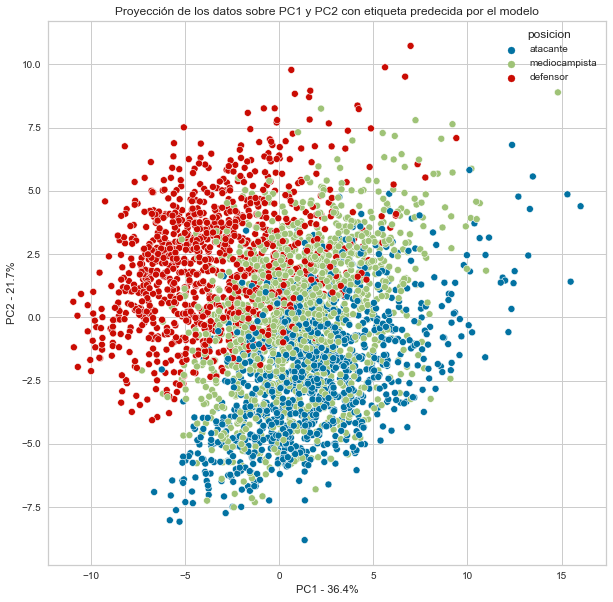

In [70]:
#pca_df = pd.DataFrame(pca_data, index=range(17107), columns=labels)
#pca_df_targets_pred = pca_df.join(Y_pred)

fig = plt.figure(figsize=(10,10))  
colors = {'0':'blue', '1':'orange'}
sns.scatterplot(x='PC1', y='PC2', data=pca_df_targets_pred, hue='posicion')
plt.title('Proyección de los datos sobre PC1 y PC2 con etiqueta predecida por el modelo')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.savefig('pca_pred.jpg', bbox_inches = 'tight') 
plt.show()

Las predicciones del modelo estan separadas apreciablemente en clusters en las primeras dos componentes de PCA, lo cual era el resultado que esperabamos obtener. La separación no es tan grande como seria deseable porque las primeras dos componentes solo tienen poco mas del 50% de la varianza, lo cual no es suficiente para expresar la variación de los datos. Observamos tambien que esta separación se da tambien en el conjunto de test, y que los graficos obtenidos para ambos conjuntos de datos son similares, como es tambien de esperar si el modelo funcionó adecuadamente. 